### Задание 1.

Дана таблица значений некоторой функциональной зависимости, полученной из n = 11 испытаний. Значение переменной x одинаково для всех вариантов, значение переменной y выбирается согласно варианту. Методом наименьших квадратов по данной табличной зависимости построить модели в вид:
1. Линейной функции
2. Степенной функции
3. Показательной функции
4. Квадратичной функции

Промежуточные вычисления вести с точностью до 0.0001. Значения параметров a, b и c окрулить до 0.01.
Построить в плоскости xOy графики полученных функций и экспериментальные точки. Проверить модели на адекватность.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Задаём данные: массив x и y (значения разделяются запятыми)
# Для примера, данные из Варианта 7:
data = np.array([
    [0.01, 1],
    [0.1,  1.22],
    [0.2,  1.48],
    [0.3,  1.78],
    [0.4,  2.12],
    [0.5,  2.50],
    [0.6,  2.92],
    [0.7,  3.38],
    [0.8,  3.88],
    [0.9,  4.42],
    [1,  5.00],
])

# Отделяем x и y
x = data[:, 0]
y = data[:, 1]
n = len(x)

df = pd.DataFrame({'X': x, 'Y': y})
df

,X,Y
0,0.01,1.00
1,0.10,1.22
2,0.20,1.48
3,0.30,1.78
4,0.40,2.12
5,0.50,2.50
6,0.60,2.92
7,0.70,3.38
8,0.80,3.88
9,0.90,4.42


In [2]:
############################
# 1. Линейная регрессия: y = a*x + b
############################
Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x * y)

a_lin = (n * Sxy - Sx * Sy) / (n * Sxx - Sx**2)
b_lin = (Sy - a_lin * Sx) / n

print("Линейная регрессия:")
print("a = {:.2f}, b = {:.2f}".format(a_lin, b_lin))
print("y = {:.2f}*x + {:.2f}".format(a_lin, b_lin))
print()


Линейная регрессия:
a = 4.02, b = 0.69
y = 4.02*x + 0.69



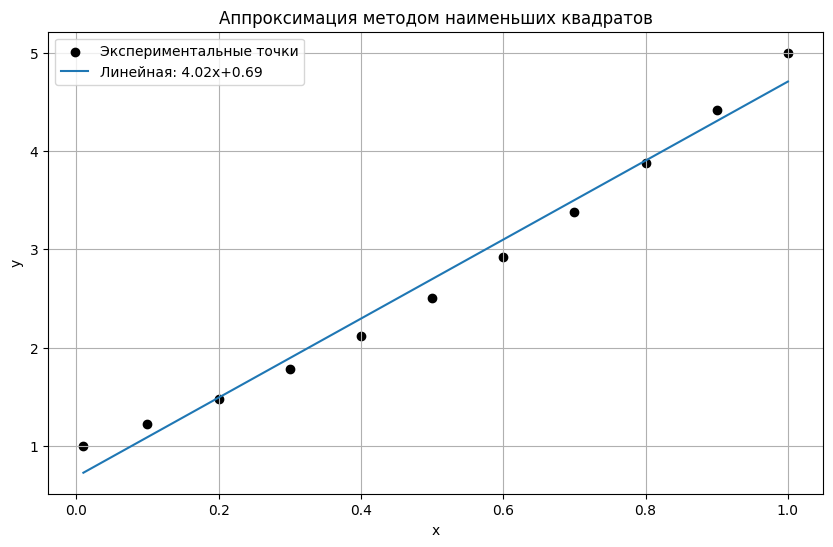

In [3]:
x_plot = np.linspace(np.min(x), np.max(x), 100)
y_lin = a_lin * x_plot + b_lin
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Экспериментальные точки')
plt.plot(x_plot, y_lin, label='Линейная: {:.2f}x+{:.2f}'.format(a_lin, b_lin))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()


Степенная аппроксимация:
a = 3.57, b = 0.35
y = 3.57 * x^0.35



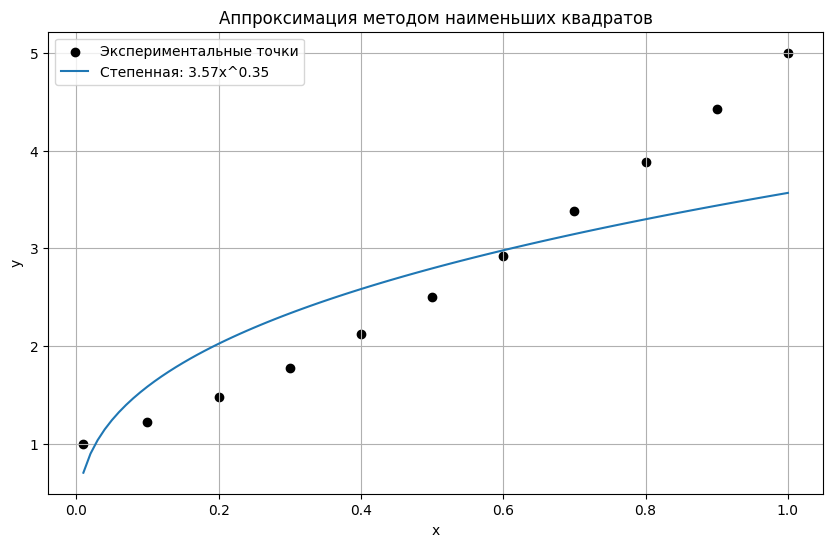

In [4]:
############################
# 2. Степенная функция: y = a*x^b
# Приводим к виду ln(y) = ln(a) + b*ln(x)
############################
# Для x <= 0 логарифм не определён, поэтому предполагаем все x > 0.
X_log = np.log(x)
Y_log = np.log(y)

S_X = np.sum(X_log)
S_Y = np.sum(Y_log)
S_XX = np.sum(X_log**2)
S_XY = np.sum(X_log * Y_log)

B_stp = (n * S_XY - S_X * S_Y) / (n * S_XX - S_X**2)
A_stp = (S_Y - B_stp * S_X) / n
a_stp = np.exp(A_stp)

print("Степенная аппроксимация:")
print("a = {:.2f}, b = {:.2f}".format(a_stp, B_stp))
print("y = {:.2f} * x^{:.2f}".format(a_stp, B_stp))
print()

x_plot = np.linspace(np.min(x), np.max(x), 100)

# Вычисляем значения для каждой аппроксимации:
y_lin = a_lin * x_plot + b_lin
y_stp = a_stp * x_plot**B_stp

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Экспериментальные точки')
plt.plot(x_plot, y_stp, label='Степенная: {:.2f}x^{:.2f}'.format(a_stp, B_stp))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()


Показательная аппроксимация:
a = 1.06, b = 1.61
y = 1.06 * exp(1.61*x)



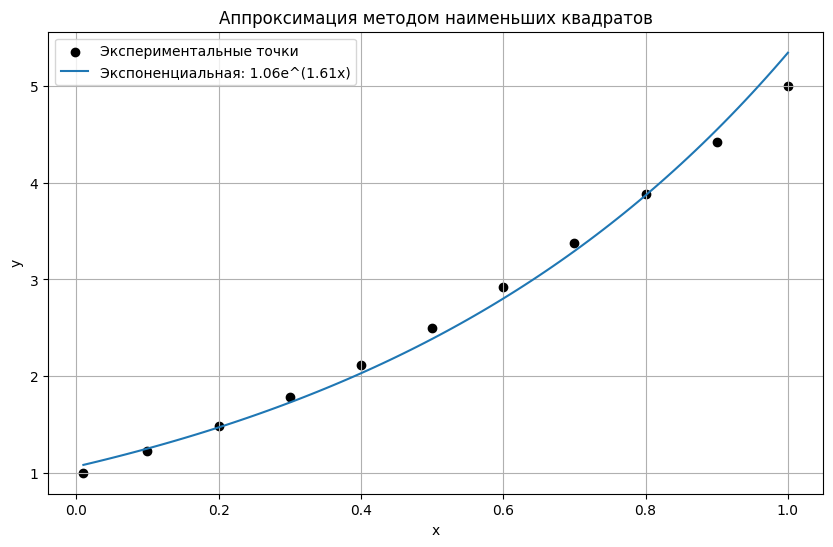

In [5]:
############################
# 3. Показательная функция: y = a * exp(b*x)
# Приводим к виду ln(y) = ln(a) + b*x
############################
Y_log_exp = np.log(y)
S_X_exp = np.sum(x)  # x те же, что и ранее
S_Y_exp = np.sum(Y_log_exp)
S_XX_exp = np.sum(x**2)
S_XY_exp = np.sum(x * Y_log_exp)

b_exp = (n * S_XY_exp - Sx * S_Y_exp) / (n * S_XX_exp - Sx**2)
A_exp = (S_Y_exp - b_exp * Sx) / n
a_exp = np.exp(A_exp)

print("Показательная аппроксимация:")
print("a = {:.2f}, b = {:.2f}".format(a_exp, b_exp))
print("y = {:.2f} * exp({:.2f}*x)".format(a_exp, b_exp))
print()


x_plot = np.linspace(np.min(x), np.max(x), 100)

# Вычисляем значения для каждой аппроксимации:
y_exp = a_exp * np.exp(b_exp * x_plot)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Экспериментальные точки')
plt.plot(x_plot, y_exp, label='Экспоненциальная: {:.2f}e^({:.2f}x)'.format(a_exp, b_exp))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()


Квадратичная регрессия:
a = 1.96, b = 2.04, c = 0.99
y = 1.96*x^2 + 2.04*x + 0.99



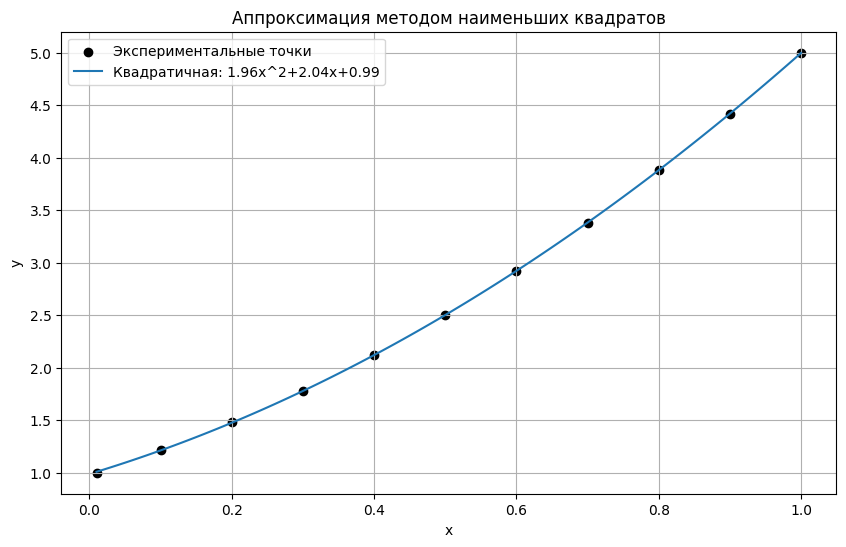

In [6]:
############################
# 4. Квадратичная регрессия: y = a*x^2 + b*x + c
############################
Sx2 = np.sum(x**2)
Sx3 = np.sum(x**3)
Sx4 = np.sum(x**4)
Sxy = np.sum(x * y)           # уже посчитано выше
Sx2y = np.sum((x**2) * y)

# Система уравнений:
# a*Sx2 + b*Sx + c*n = Sy
# a*Sx3 + b*Sx2 + c*Sx = Sxy
# a*Sx4 + b*Sx3 + c*Sx2 = Sx2y
# Составляем матрицу коэффициентов и вектор правых частей:
M = np.array([[Sxx,    Sx,  n],
              [Sx3,   Sx2, Sx],
              [Sx4,   Sx3, Sxx]])
R = np.array([Sy, Sxy, Sx2y])

# Решаем систему:
coeffs = np.linalg.solve(M, R)
a_quad, b_quad, c_quad = coeffs

print("Квадратичная регрессия:")
print("a = {:.2f}, b = {:.2f}, c = {:.2f}".format(a_quad, b_quad, c_quad))
print("y = {:.2f}*x^2 + {:.2f}*x + {:.2f}".format(a_quad, b_quad, c_quad))
print()

############################
# Построение графика
############################
# В этом примере построим график линейной функции вместе с экспериментальными точками.
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Вычисляем значения для каждой аппроксимации:
y_quad = a_quad * x_plot**2 + b_quad * x_plot + c_quad

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', label='Экспериментальные точки')
plt.plot(x_plot, y_quad, label='Квадратичная: {:.2f}x^2+{:.2f}x+{:.2f}'.format(a_quad, b_quad, c_quad))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()
